In [26]:
from PIL import Image
import matplotlib.pyplot as plt


In [27]:
location="SampleImages/"
name_source="original.png"
name_target="target.png"

In [28]:
img = Image.open(location+name_source)
pixels = img.load()


In [29]:
Gr = {}
L = 256

In [30]:
for i in range(L):
  Gr[i] = 0;
rows = img.size[0]
columns = img.size[1]
MN = rows*columns
for i in range(rows):
  for j in range(columns):
    Gr[pixels[i, j]] = Gr[pixels[i, j]] + 1

Original


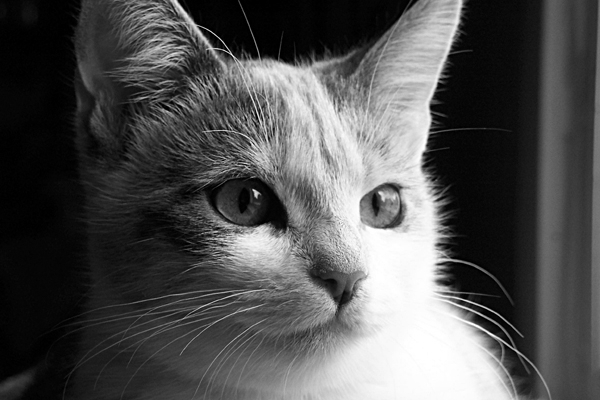

In [31]:
print("Original")
display(img)

It's histogram


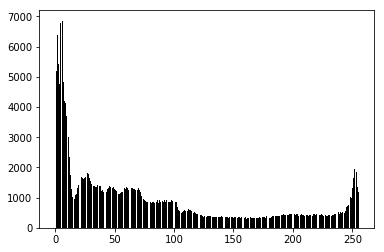

In [32]:
print("It's histogram")
plt.bar(list(Gr.keys()), Gr.values(), color='black')
plt.show()

Target image


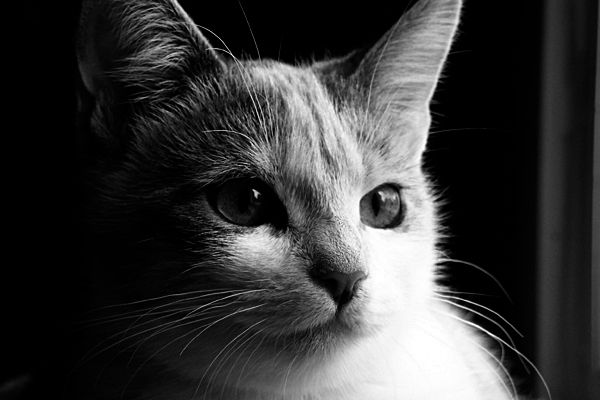

In [33]:
#target image 
print("Target image")
target_img = Image.open(location+name_target)
target_pixels = target_img.load()
display(target_img)

It's histogram


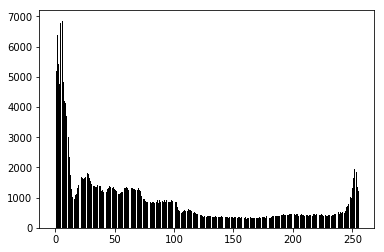

In [34]:
target_Gr = {}
for i in range(L):
  target_Gr[i] = 0
for i in range(rows):
  for j in range(columns):
    target_Gr[target_pixels[i, j]] = Gr[target_pixels[i, j]] + 1
print("It's histogram")
plt.bar(list(target_Gr.keys()), target_Gr.values(), color='black')
plt.show()


In [35]:
prev = 0
cdf = {}
s = {}
for i in range(L):
  cdf[i] = prev + Gr[i]
  prev += Gr[i]
for i in range(L):
  s[i] = (L-1)*cdf[i]/MN
rounded_s = {}
for i in range(L):
  rounded_s[i] = round(s[i])
# print(rounded_s)
prev = 0
target_prk = {}

In [36]:
for i in range(L):
  target_prk[i] = 0
for i in range(L):
  target_prk[i] = prev + target_Gr[i]
  prev += target_Gr[i]
target_cdf = {}
for i in range(L):
  target_cdf[i] = (L-1)*target_prk[i]/MN
target_rounded_s = {}
for i in range(L):
  target_rounded_s[i] = round(target_cdf[i])
  

In [37]:
mapping = {}
for i in range(L):
  nearest = 0
  nearest_difference = abs(target_rounded_s[nearest] - rounded_s[i])
  for j in range(1, L):
    if nearest_difference > abs(target_rounded_s[j] - rounded_s[i]):
      nearest = j
      nearest_difference = abs(target_rounded_s[j] - rounded_s[i])          
  mapping[i] = nearest


After Histogram mapping


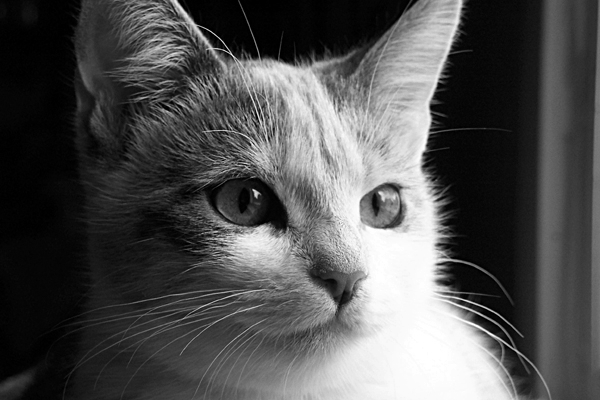

In [38]:
for i in range(rows):
  for j in range(columns):
    pixels[i, j] = mapping[pixels[i, j]]
print("After Histogram mapping")
display(img)